Finding Heavy Traffic Indicators on I-94
Introduction
In this project, we are going to analyze a dataset about the westbound traffic on the I-94 Interstate highway. John Hogue made the dataset available, and it can be downloaded from the UCI Machine Learning Repository.

The aim of our investigation is to identify a few indicators of heavy traffic on I-94. These indicators can include weather, time of day, weekday, and so on. For example, we may discover that traffic is typically heavier in the summer or when it snows.

The I-94 Traffic Dataset

In [42]:
import pandas as pd 

#Read in the data
traffic_I94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic_I94

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00            5545  
1               broken clouds  2012-10-02 10:00:00            4516  
2             overcast clouds  2012-10-02 11:00:00            4767  
3             overcast clouds  2012-10-02 12:00:00            5026  
4               broken clouds  2012-10-02 13:00:00            4918  
...                       ...                  ...             ...  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  

[48204 rows x 9 columns]

In [43]:
#display first five rows
traffic_I94.head(5)

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

In [44]:
#display last five rows
traffic_I94.tail(5)

holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954

In [45]:
traffic_I94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In this dataset, there are a total of 9 columns and 48204 rows. None of the rows have null values with a mixture of float, integer and object data types. The date_time column shows that the record starts from 2012-10-02 09:00:00 and 2018-09-30 23:00:00.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

Analyzing Traffic Volume

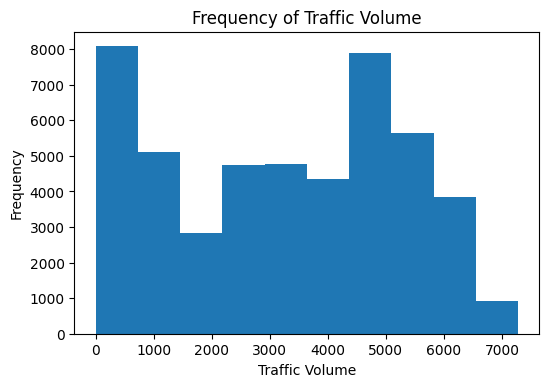

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot a histogram using a Pandas method
traffic_I94['traffic_volume'].plot.hist()
plt.title('Frequency of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.show()

In [47]:
#create a summary of statistics of traffic_volume column
traffic_I94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the summary of statistics of the traffic_volume column, we see that the hourly traffic volume varied from 0 to 7,280 cars, with an average volume of 3259 cars. About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

The potential outcome that nighttime and daytime traffic volumes may influence each other steers our analysis in an interesting direction: comparing daytime and nighttime data.

Traffic Volume: Day vs. Night

In [48]:
#transform the column to a datetime datatype

traffic_I94['date_time'] = pd.to_datetime(traffic_I94['date_time'])
traffic_I94['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [49]:
#copy dataframe for the isolation of  daytime data

day_time = traffic_I94.copy()[(traffic_I94['date_time'].dt.hour >= 7) & (traffic_I94['date_time'].dt.hour < 19)]
day_time.shape

(23877, 9)

In [50]:
night_time = traffic_I94.copy()[(traffic_I94['date_time'].dt.hour >= 19) | (traffic_I94['date_time'].dt.hour < 7)]
night_time.shape

(24327, 9)

Here, we divided the dataset into two parts:

Daytime data: hours from 7 AM to 7 PM (12 hours) Nighttime data: hours from 7 PM to 7 AM (12 hours)

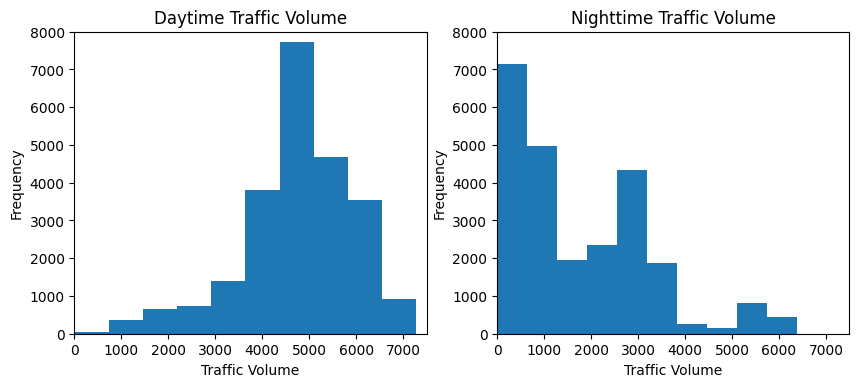

In [51]:
#plot a histogram using a Pandas method

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(day_time['traffic_volume'])
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(night_time['traffic_volume'])
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

plt.show()

In [52]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [53]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime histogram is leftskewed, Most of the values pile up on the right side of the histogram and the median is higher than the mean. The nighttime histogram is rightskewed, Most of the values pile up on the left side of the histogram and the mean is higher than the median.

Traffic at night is light compared to the daytime when you look at the averages and our goal is to find the indicators of heavy traffic, so we will be using the daytime data going forward.

Time Indicators

In [54]:
#create new column for traffic volume measured each month

day_time['month'] = day_time['date_time'].dt.month

#get average traffic volume for each month

by_month = day_time.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

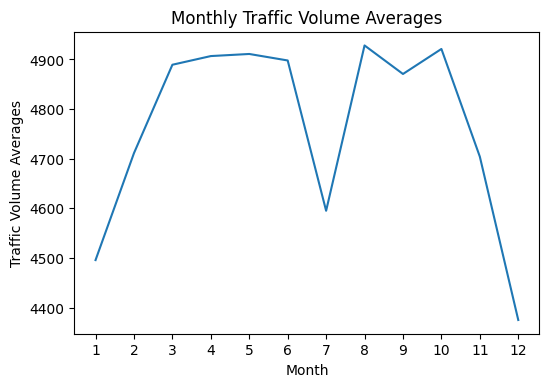

In [55]:
#plot a line graph showing monthly traffic volume averages

by_month['traffic_volume'].plot.line()    
plt.title('Monthly Traffic Volume Averages')
plt.xlabel('Month')
plt.ylabel('Traffic Volume Averages') 
plt.xticks(range(1,13))
plt.show()

We can see from the line graph that the traffic volume has high averages in March - June, and August - October, they are also warm months while traffic volume with low averages are in January, February, November and December which are also the cold months. But July has a low traffic volume average, which is quite unusual.

Let's find out why July is an exception by analyizing the traffic volume change each year in July.

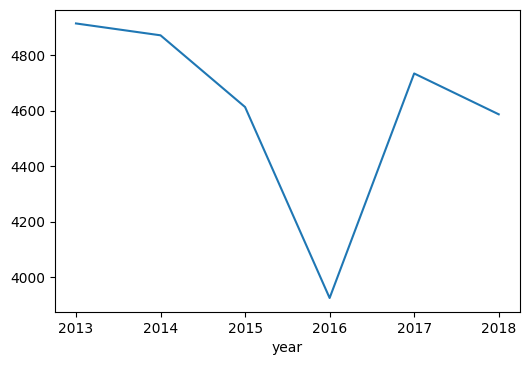

In [56]:
#create new column for traffic volume measured yearly

day_time['year'] = day_time['date_time'].dt.year

only_july = day_time[day_time['month'] == 7]
only_july = only_july.groupby('year').mean()
only_july['traffic_volume'].plot.line()

plt.show()

Traffic is generally heavy in July, as it is in other warm months. The only exception is 2016, which saw a significant decrease in traffic volume. One possible explanation is road construction, which is supported by this 2016 article. As a rough conclusion, we can say that warm months generally have more traffic than cold months. During a warm month, traffic volume can reach 5,000 cars per hour.

Time Indicators (II)

In [57]:
#create new column for traffic volume measured daily

day_time['dayofweek'] = day_time['date_time'].dt.dayofweek

#get average traffic volume for each day

by_dayofweek = day_time.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

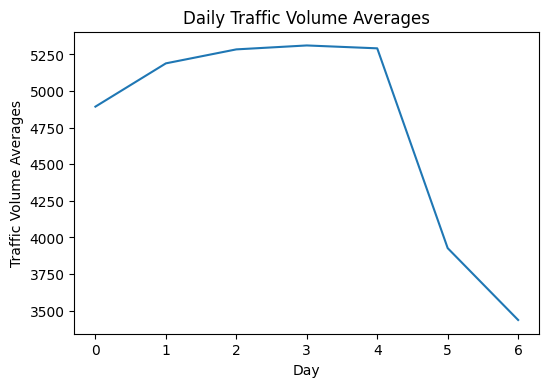

In [58]:
#plot a line graph showing daily traffic volume averages

by_dayofweek['traffic_volume'].plot.line()
plt.title('Daily Traffic Volume Averages')
plt.xlabel('Day')
plt.ylabel('Traffic Volume Averages') 
plt.show()

On business days (Monday through Friday), traffic volume is significantly higher. Except for Monday, we only see values in exceeding 5,000 on business days. Weekend traffic is lighter, with fewer than 4,000 vehicles.

Time Indicators (III)

In [64]:
#split the data based on the day type

day_time['hour'] = day_time['date_time'].dt.hour
business_days = day_time.copy()[day_time['dayofweek'] <= 4]  #4 == Friday
weekend = day_time.copy()[day_time['dayofweek'] > 4 ]

In [62]:
#get average traffic volume for business days

by_hour_businessdays = business_days.groupby('hour').mean()

#get average traffic volume for weekends

by_hour_weekends = weekend.groupby('hour').mean()

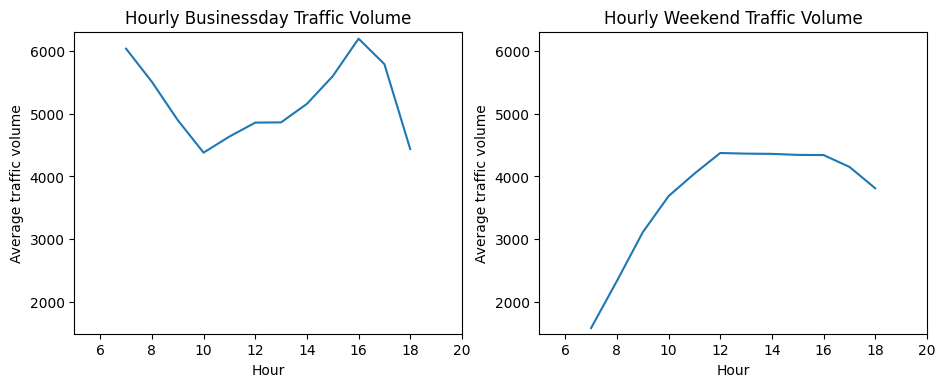

In [65]:
#Plot two line plots showing average traffic volume changes by time of the day

plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
by_hour_businessdays['traffic_volume'].plot.line()
plt.xlim(5,20)
plt.ylim(1500,6300)
plt.title('Hourly Businessday Traffic Volume')
plt.xlabel('Hour')
plt.ylabel('Average traffic volume')

plt.subplot(1, 2, 2)
by_hour_weekends['traffic_volume'].plot.line()
plt.xlim(5,20)
plt.ylim(1500,6300)
plt.title('Hourly Weekend Traffic Volume')
plt.xlabel('Hour')
plt.ylabel('Average traffic volume')
plt.show()

When comparing business days to weekends, traffic volume is generally higher at each hour of the day. The rush hours are between 7 and 16 a.m., when most people travel from home to work and back. During rush hour, we see over 6,000 cars. While on weekends, traffic volume can be less than 2000 cars and up to 4372 cars.

In summary, traffic is typically heavier during the warm months (March–October) than during the cold months (November–February). On business days, traffic is typically heavier than on weekends.  The rush hours on business days are between 7 and 16 a.m.

Weather Indicators

In [66]:
#find correlation 
day_time.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of +0.128.

In [ ]:
#plot a scatter plot

plt.scatter(day_time['temp'], day_time['traffic_volume'])
plt.show()

We can conclude that temperature does not look like a solid indicator of heavy traffic.

Weather Types

In [ ]:
#calculate the average traffic volume for the categorical weather-related columns

by_weather_main = day_time.groupby('weather_main').mean()

#plot horizontal bar plot

by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Average traffic volume')
plt.ylabel('weather main')
plt.show()

There appears to be no weather type where traffic volume exceeds 5,000 cars. This makes it more difficult to locate a heavy traffic indicator. Let's also group by weather description, which has a larger weather classification.

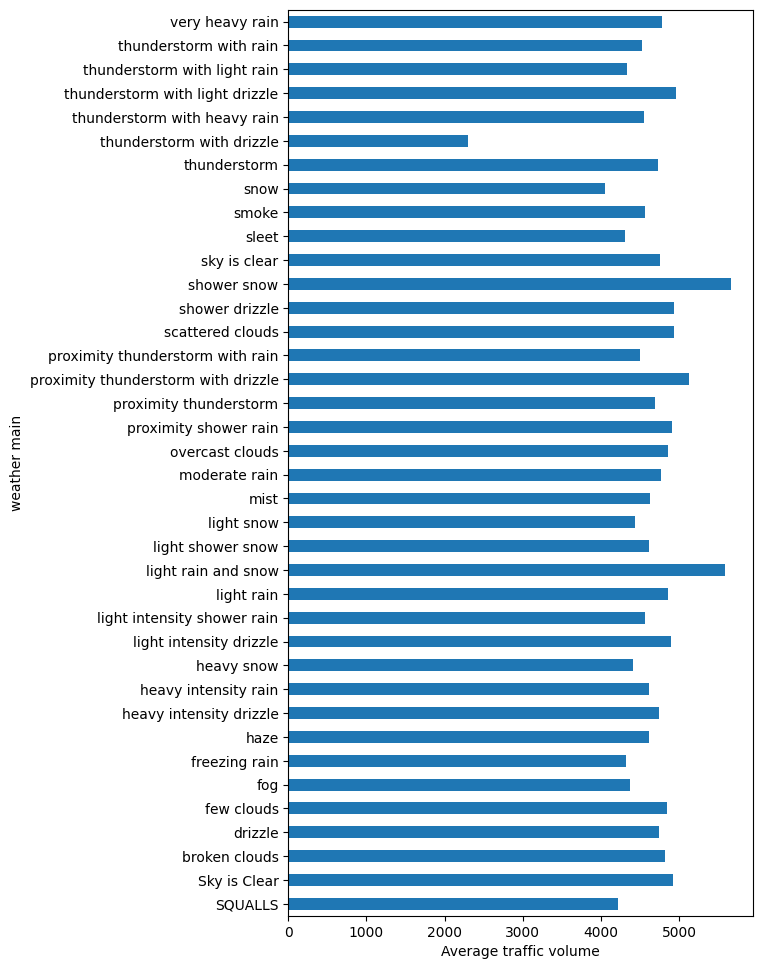

In [67]:
by_weather_description = day_time.groupby('weather_description').mean()

#plot horizontal bar plot

by_weather_description['traffic_volume'].plot.barh(figsize=(6,12))
plt.xlabel('Average traffic volume')
plt.ylabel('weather main')
plt.show()

Where traffic volume exceeds 5,000, it appears that three weather types exist: shower snow, light rain and snow, and proximity thunderstorm with drizzle. It's unclear why these weather types have the highest average traffic values — this seems to be bad weather, and not particularly bad. When the weather is bad, perhaps more people take their cars out of the garage instead of riding a bicycle or having to walk.

Conclusion
We attempted to identify a few indicators of heavy traffic on the I-94 Interstate highway in this project. We were successful in locating two types of indicators: Time Indicators and Weather Indicators.

Time indicators

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.
Weather indicators

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle